<a href="https://colab.research.google.com/github/hH-13/wangernum/blob/main/basicish/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear regression

**Correlation and Linear Regression**

* Regression is concerned with specifying the relationship between a single numeric dependent variable (the value to be predicted) and one or more numeric independent variables (the predictors).  

* The simplest forms of regression assume that the relationship between the independent and dependent variables follows a straight line.

* You might recall from basic algebra that lines can be defined in a slope-intercept form similar to y = a + bx.

* The slope term b specifies how much y rises for each unit increase in x.

* Positive values define lines that slope upward while negative values define lines that slope downward.

* The term a is known as the intercept because it specifies the point where the line crosses, or intercepts, the vertical y axis. It indicates the value of y when x = 0.

https://www.mathsisfun.com/data/straight_line_graph.html



---



* Quantifying the causal relationship between an event and the response, such as those in clinical drug trials, engineering safety tests, or marketing research

* Identifying patterns that can be used to forecast future behaviour given known criteria, such as predicting insurance claims, natural disaster damage, election results, and crime rates

* Regression methods are also used for statistical hypothesis testing, which determines whether a premise is likely to be true or false in light of the observed data.

* The regression model's estimates of the strength and consistency of a relationship provide information that can be used to assess whether the observations are due to chance alone.

* Regression analysis is not synonymous with a single algorithm. Rather, it is an umbrella for a large number of methods that can be adapted to nearly any machine learning task.

* Simple Linear regression (1 independent variable) vs  Multiple Linear regression (multiple independent variables)




---




* In order to determine the optimal estimates of α and β, an estimation method known as **Ordinary Least Squares (OLS)** was used. In OLS regression, the slope and intercept are chosen so that they minimize the sum of the squared errors, that is, the vertical distance between the predicted y value and the actual y value. These errors are known as residuals

* The **correlation coefficient** ranges between -1 and +1. The extreme values indicate a perfectly linear relationship, while a correlation close to zero indicates the absence of a linear relationship.




---



**The Seven Classical OLS Assumptions:**
* The regression model is linear in the coefficients and the error term
* The error term has a population mean of zero
* All independent variables are uncorrelated with the error term
* Observations of the error term are uncorrelated with each other
* The error term has a constant variance (no heteroscedasticity)
* No independent variable is a perfect linear function of other explanatory variables
* The error term is normally distributed (optional)

----------

* Root Mean Square Error (**RMSE**) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

* You can find the RMSE by: Squaring the residuals. Finding the average of the residuals. Taking the square root of the result.

* **R-squared** is a statistical measure (coefficient of determination) of how close the data are to the fitted regression line.  It is the amount of explained variance of Y (dependent variable) due to X (independent variable)

* **Adjusted R-squared** increases only if the new predictor improves the model.

https://www.investopedia.com/ask/answers/012615/whats-difference-between-rsquared-and-adjusted-rsquared.asp#:~:text=What%20Is%20the%20Difference%20Between,and%20R%2Dsquared%20does%20not.



---



**Strengths**
* By far the most common approach for modeling numeric data
* Can be adapted to model almost any modeling task
* Provides estimates of both the strength and size of the relationship

**Weaknesses**
* Makes strong assumptions about the data
* The model's form must be specified by the user in advance
* Does not handle missing data
* Only works with numeric features, so categorical data requires extra processing
* Requires some knowledge of statistics to understand the model

**Interaction effect:**
* In regression, an interaction effect exists when the effect of an independent variable on a dependent variable changes, depending on the value(s) of one or more other independent variables.
* In statistics, an interaction is a special property of three or more variables, where two or more variables interact to affect a third variable in a non-additive manner. In other words, the two variables interact to have an effect that is more than the sum of their parts

y = b0 + b1X1 + b2X2 + b3X1X2  (b0 is same as a)


**Basic examples**

In [ ]:
# Simple  Linear regression
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([3, 20, 22, 39, 49, 53]) # replace with [5, 15, 25, 35, 45, 55] and see

print(x.shape)
print(y.shape)
print(x)
print(y)

(6, 1)
(6,)
[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 3 20 22 39 49 53]


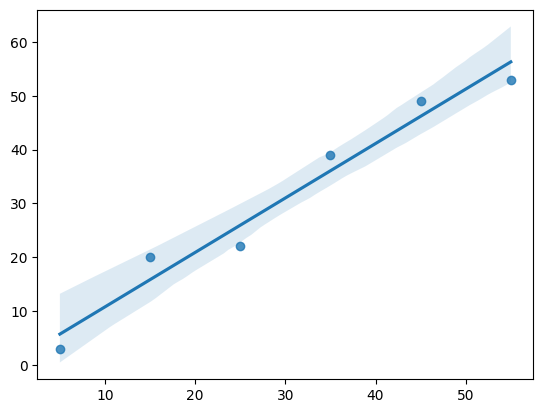

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.regplot(x=x,y=y)
plt.show()

In [ ]:
model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 1.0


In [ ]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -7.105427357601002e-15
slope: [1.]


In [ ]:
y_pred = model.predict(x) # anything else apart from x
from sklearn.metrics import mean_squared_error
print('predicted response:', y_pred, sep='\n')
# [3, 20, 22, 39, 49, 53]
rmse=np.sqrt(mean_squared_error(y,y_pred))
print(rmse)

predicted response:
[ 5. 15. 25. 35. 45. 55.]
4.118313910115614e-15


In [ ]:
# another way to get the same output
y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 5.71428571]
 [15.82857143]
 [25.94285714]
 [36.05714286]
 [46.17142857]
 [56.28571429]]


In [ ]:
# Multiple Linear regression
import numpy as np
from sklearn.linear_model import LinearRegression

x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [ ]:
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8615939258756776
intercept: 5.52257927519819
slope: [0.44706965 0.25502548]


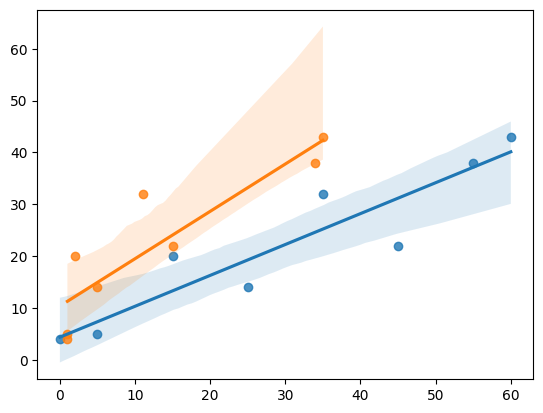

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.regplot(x=x[:,0:1], y=y)
sb.regplot(x=x[:,1:2], y=y)
plt.show()

In [ ]:
x_new = np.arange(10).reshape((-1, 2))
print(x_new)

y_new = model.predict(x_new)
print(y_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


**Advanced example**

In [ ]:
# https://www.kaggle.com/datasets/elikplim/concrete-compressive-strength-data-set

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

df = pd.read_csv('concrete_data.csv')

df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


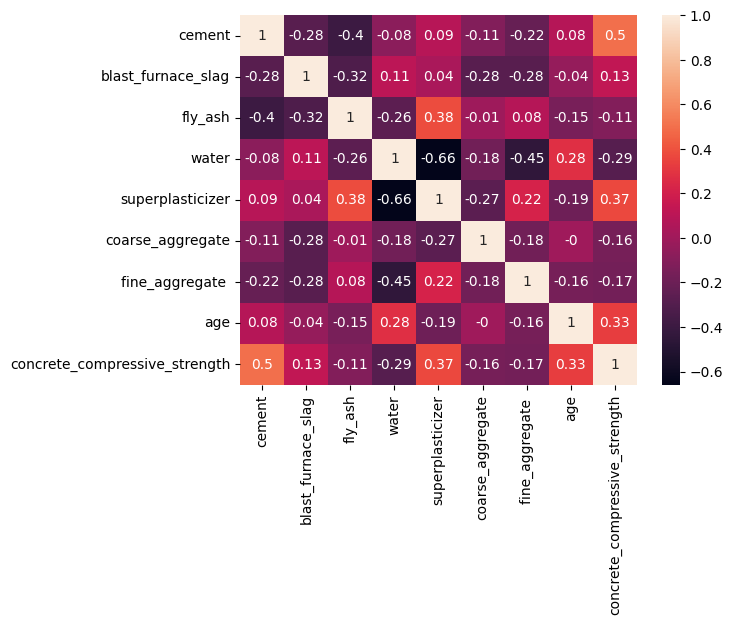

In [ ]:
sns.heatmap(df.corr().round(2),annot=True)
plt.show()

In [ ]:
df.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [ ]:
# define a function that removes outliers
def remove_outliers(data):
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    iqr = q3-q1
    upper = q3+1.5*iqr
    lower = q1-1.5*iqr
    #data[(data>lower)&(data<upper)]
    print((data>lower)&(data<upper))
    return data[(data>lower)&(data<upper)]

# create an empty data frame
df_clean = pd.DataFrame()

# populate data frame with no outliers
for name,value in df.iteritems():
    df_clean[name] = remove_outliers(value)

0       True
1       True
2       True
3       True
4       True
        ... 
1025    True
1026    True
1027    True
1028    True
1029    True
Name: cement, Length: 1030, dtype: bool
0       True
1       True
2       True
3       True
4       True
        ... 
1025    True
1026    True
1027    True
1028    True
1029    True
Name: blast_furnace_slag, Length: 1030, dtype: bool
0       True
1       True
2       True
3       True
4       True
        ... 
1025    True
1026    True
1027    True
1028    True
1029    True
Name: fly_ash, Length: 1030, dtype: bool
0       True
1       True
2       True
3       True
4       True
        ... 
1025    True
1026    True
1027    True
1028    True
1029    True
Name: water, Length: 1030, dtype: bool
0       True
1       True
2       True
3       True
4       True
        ... 
1025    True
1026    True
1027    True
1028    True
1029    True
Name: superplasticizer, Length: 1030, dtype: bool
0       True
1       True
2       True
3       True
4       Tru

<ipython-input-40-fb69f3356b49>:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name,value in df.iteritems():


In [ ]:
df_clean.isna().sum()

cement                            0
blast_furnace_slag                2
fly_ash                           0
water                             9
superplasticizer                 10
coarse_aggregate                  0
fine_aggregate                    5
age                              59
concrete_compressive_strength     4
dtype: int64

In [ ]:
# remove missing values
df_clean.dropna(axis=0,inplace=True)

# reset index
df_clean.reset_index(drop=True, inplace=True)
df_clean.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features_clean = df_clean.iloc[:,:-1]
strength_clean = df_clean.iloc[:,-1]

features = df.iloc[:,:-1]
strength = df.iloc[:,-1]

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    features_clean,strength_clean,test_size=0.3,random_state=42)

X_train, X_test, y_train, y_test = train_test_split(features,strength,test_size=0.3,random_state=42)

In [ ]:
# train check data
regression = LinearRegression()
regression.fit(X_train,y_train)

# print out the results
print(f'Training data r-squared:{regression.score(X_train, y_train)}')
print(f'Test data r-squared:{regression.score(X_test, y_test)}')

Training data r-squared:0.6196723710532998
Test data r-squared:0.5943782479239206


In [ ]:
# train check clean data
regression = LinearRegression()
regression.fit(X_train_clean,y_train_clean)

# print out the results
print(f'Training data r-squared:{regression.score(X_train_clean, y_train_clean)}')
print(f'Test data r-squared:{regression.score(X_test_clean, y_test_clean)}')

Training data r-squared:0.7745552036054404
Test data r-squared:0.7550275284843796


In [ ]:
y_test_clean[10:13]

215    42.70
628    41.68
542    35.17
Name: concrete_compressive_strength, dtype: float64

In [ ]:
# predict values for test data
y_pred=regression.predict(X_test_clean[10:13])
y_pred

array([36.52803633, 35.7358487 , 46.57107735])

### Polynomial regression

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
datas = pd.read_csv('TemPres.csv')
print(datas)

   sno  Temperature  Pressure
0    1            0    0.0002
1    2           20    0.0012
2    3           40    0.0060
3    4           60    0.0300
4    5           80    0.0900
5    6          100    0.2700


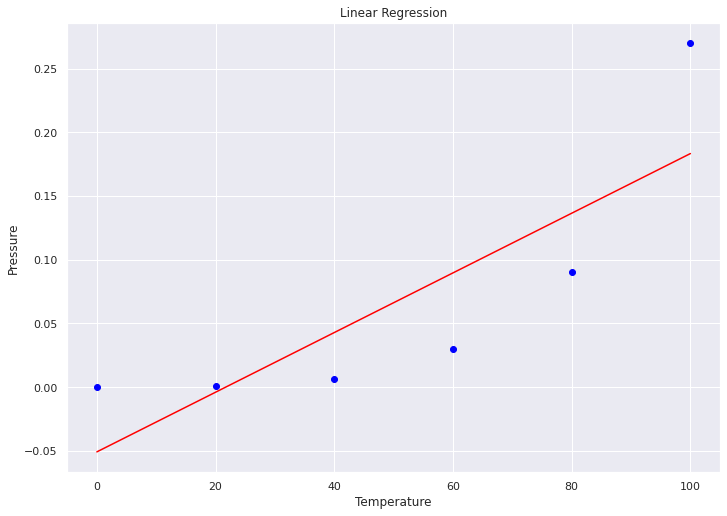

In [ ]:
X = datas.iloc[:, 1:2].values
y = datas.iloc[:, 2].values
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin.fit(X, y)

# Visualising the Linear Regression results
plt.scatter(X, y, color = 'blue')

plt.plot(X, lin.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

plt.show()

In [ ]:
# https://www.mathsisfun.com/algebra/polynomials.html
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)

lin2 = LinearRegression()
lin2.fit(X_poly, y)


LinearRegression()

[[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 2.000e+01 4.000e+02 8.000e+03 1.600e+05]
 [1.000e+00 4.000e+01 1.600e+03 6.400e+04 2.560e+06]
 [1.000e+00 6.000e+01 3.600e+03 2.160e+05 1.296e+07]
 [1.000e+00 8.000e+01 6.400e+03 5.120e+05 4.096e+07]
 [1.000e+00 1.000e+02 1.000e+04 1.000e+06 1.000e+08]]


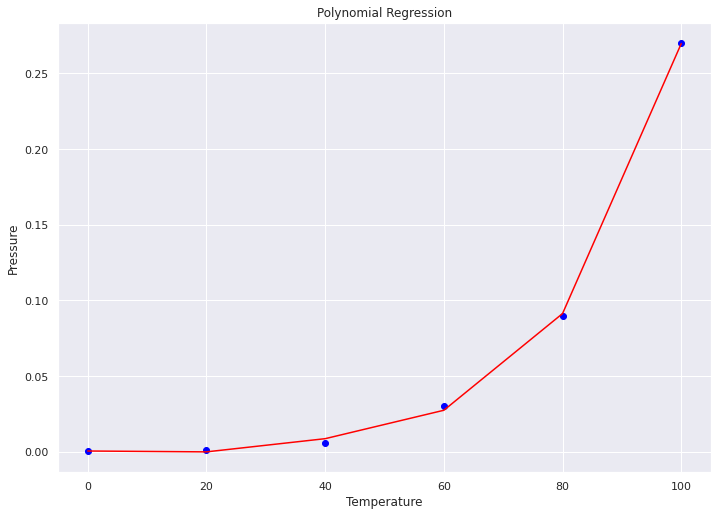

In [ ]:
print(X_poly)

# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'blue')

plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

plt.show()

In [ ]:
# Predicting a new result with Linear Regression
print(lin.predict(np.array([[110.0]])))
# Predicting a new result with Polynomial Regression
print(lin2.predict(poly.fit_transform(np.array([[110.0]]))) )

[0.20675333]
[0.43295877]


### Logistic regression

**Logistic regression** extends the ideas of multiple linear regression to the situation where the dependent variable, y, is binary (for convenience we often code these values as 0 and 1).  Logarithms are used for this.

* As with multiple linear regression the independent variables x1, x2 · · · xk maybe categorical or continuous variables or a mixture of these two types.


In [ ]:
# sigmoid function example
e=2.72
y=-2# (a+bx)
num=e**(y) # try with 3 etc
den=1+num
val=num/den
val

0.11907029910459133

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# import library for Logistic regression
from sklearn.linear_model import LogisticRegression

# https://www.kaggle.com/uciml/pima-indians-diabetes-database
# load dataset
# pimaDataset = pd.read_csv("diabetes.csv")
pimaDataset = pd.read_csv('https://github.com/hH-13/wangernum/raw/refs/heads/main/basicish/diabetes.csv')


# Show the information on fields
pimaDataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [2]:
pimaDataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


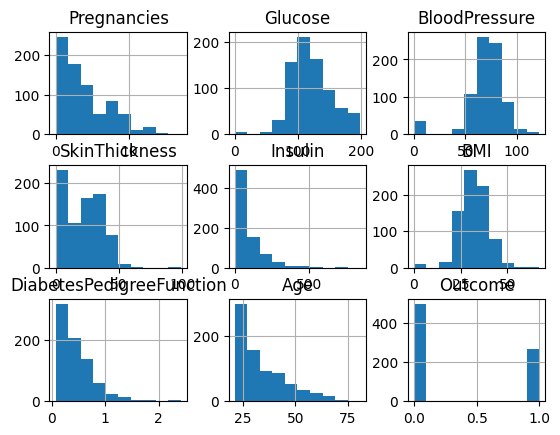

In [3]:
# Show distribution of various columns
pimaDataset.hist()
plt.show()

In [4]:
#split dataset into features and target variable
y = pimaDataset['Outcome']
X = pimaDataset.drop(['Outcome'], axis = 1)

# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# predict values
y_pred=logreg.predict(X_test)

# print the confusion matrix to determine model accuracy
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

# Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[107  12]
 [ 27  46]]
Accuracy: 0.796875


In [5]:
new_x=pd.read_csv("diabetes_new.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes_new.csv'

In [ ]:
# predict values
y_pred_new=logreg.predict(new_x)
y_pred_new

array([1, 1])